# Assignment 2: Due Tuesday 9/17

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)). Your answer should depend on only $v_x, v_y,$ and $g$ 

Equations with no air resistance ($c = 0$):

* $v_x' = $0

* $x' = $Vx

* $v_y' = $-g

* $y' = $Vy

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

Code the equations into a function 

In [2]:
#define projectile motion function in vaccum
#def proj_vac

g=9.81 # Gravitational Acceleration, (m/s^2)
D=0.15 # Diameter of the cannonball (meters)
theta=50 # launch angle in (degrees)
initial_velocity=300 #(m/s)
mass=7.8*(4/3)*np.pi**(D/2)**3 #mass as a function of density
launch_angle=(theta*np.pi)/180 #radians
V0=initial_velocity #(m/s)
Vx0=V0*np.cos(launch_angle) #(m/s)
Vy0=V0*np.sin(launch_angle) #(m/s)
x0= 0 #meters
y0= 0 #meters


In [3]:
def equations(t, variables):
    x,y,Vx,Vy=variables
    V=np.sqrt(Vx**2+Vy**2)
    dxdt=Vx
    dydt=Vy
    dVxdt=0 
    dVydt=-g
    return [dxdt,dydt,dVxdt,dVydt]

Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 50\;s$

In [4]:
#code
t_span=(0,50) 
t_eval=np.linspace(0,50,1000) 
initial_conditions=[x0,y0,Vx0,Vy0]
solution=solve_ivp(equations,t_span, initial_conditions,method='RK45', t_eval=t_eval)
x_vals=solution.y[0]
y_vals=solution.y[1]

Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range. At what time does the ball hit the ground?

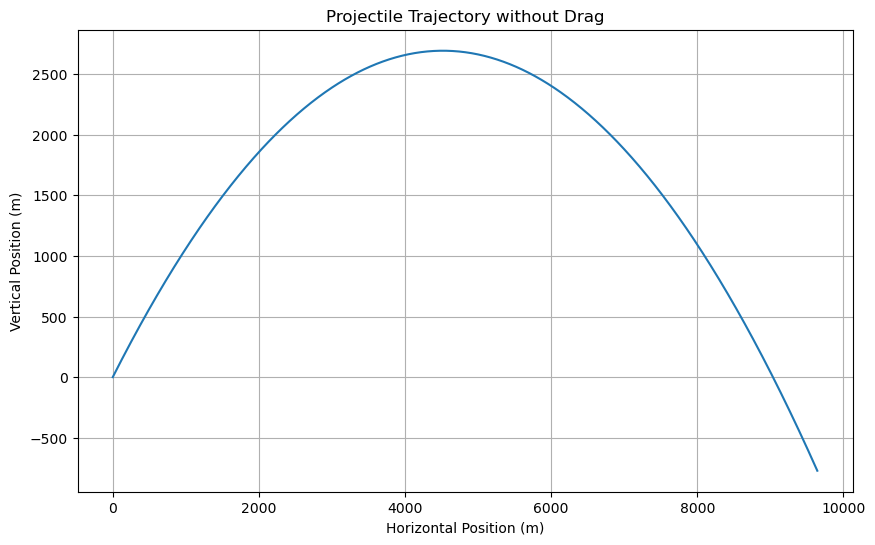

In [5]:
#codes
plt.figure(figsize=(10,6))
plt.plot(x_vals,y_vals)
plt.title('Projectile Trajectory without Drag')
plt.xlabel('Horizontal Position (m)')
plt.ylabel('Vertical Position (m)')
plt.grid(True)
plt.show()

# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

In [6]:
#defining this for later
rho=7.8*1000
mass=rho*(4/3)*np.pi*(D/2)**3

In [27]:
h=1

In [28]:
#redefined variables as numpy array so it would be easier to sort later, had a few issues
def equations(t,variables):
    x,y,Vx,Vy=variables
    V=np.sqrt(Vx**2+Vy**2)
    dxdt=Vx
    dydt=Vy
    dVxdt=0 
    dVydt=-g
    return np.array([dxdt,dydt,dVxdt,dVydt])

In [29]:
#codes
def rk45_step(f,t,y,h):
    k1=h*f(t,y)
    k2=h*f(t+h/2,y+k1/2)
    k3=h*f(t+h/2,y+k2/2)
    k4=h*f(t+h,y+k3)
    return y+(k1+2*k2+2*k3+k4)/6

In [30]:
def rk45_solver(equations,t_span,initial_conditions,h):
    t0,tf=t_span
    t_vals=np.arange(t0,tf,h)
    num_steps=len(t_vals)
    y_vals=np.zeros((len(initial_conditions),num_steps))
    y_vals[:, 0]=initial_conditions    
    for i in range(1,num_steps):
        y_vals[:, i]=rk45_step(equations,t_vals[i-1],y_vals[:,i-1],h=1)      
        if y_vals[1, i]<0:
            break  
    return t_vals[:i],y_vals[:,:i]

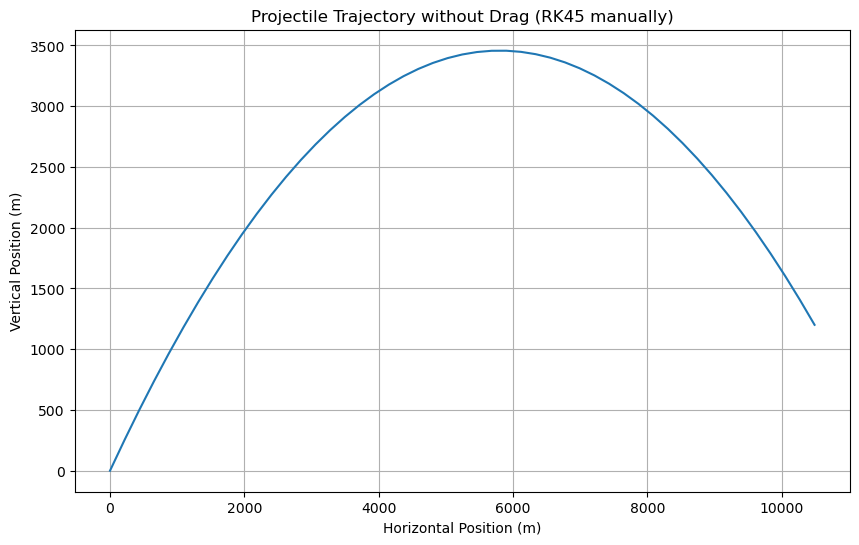

In [31]:
t_span=(0,50)
initial_conditions=[x0,y0,Vx0,Vy0]
t_vals,solution=rk45_solver(equations,t_span,initial_conditions,h)
x_vals1=solution[0]
y_vals1=solution[1]
plt.figure(figsize=(10, 6))
plt.plot(x_vals1, y_vals1)
plt.title('Projectile Trajectory without Drag (RK45 manually)')
plt.xlabel('Horizontal Position (m)')
plt.ylabel('Vertical Position (m)')
plt.grid(True)
plt.show()

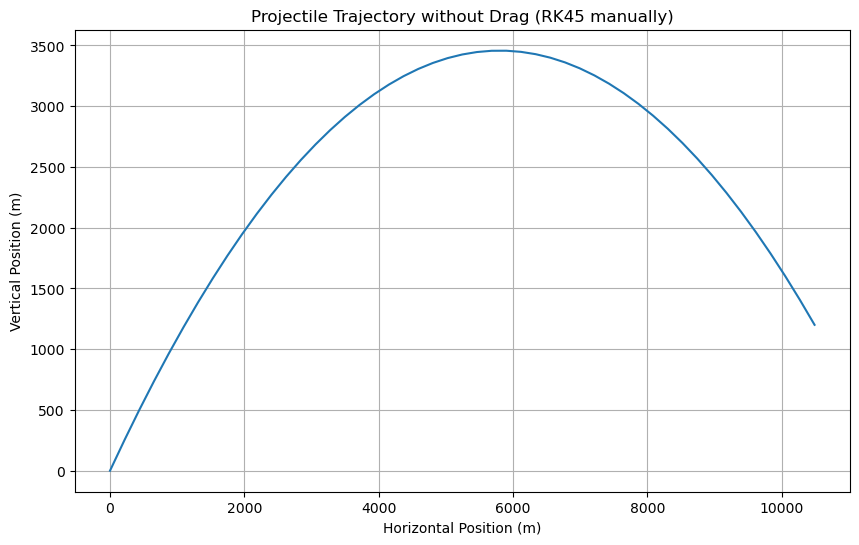

In [26]:
#here's everything in one cell because it wasn't working separated, I tried multiple things but the last cell was giving me an integer/list error and it wasn't recognizing it from the cell above for some reason
h=1
def equations(t,variables):
    x,y,Vx,Vy=variables
    V=np.sqrt(Vx**2+Vy**2)
    dxdt=Vx
    dydt=Vy
    dVxdt=0 
    dVydt=-g
    return np.array([dxdt,dydt,dVxdt,dVydt])
def rk45_step(f,t,y,h):
    k1=h*f(t,y)
    k2=h*f(t+h/2,y+k1/2)
    k3=h*f(t+h/2,y+k2/2)
    k4=h*f(t+h,y+k3)
    return y+(k1+2*k2+2*k3+k4)/6
def rk45_solver(equations,t_span,initial_conditions,h):
    t0,tf=t_span
    t_vals=np.arange(t0,tf,h)
    num_steps=len(t_vals)
    y_vals=np.zeros((len(initial_conditions),num_steps))
    y_vals[:, 0]=initial_conditions    
    for i in range(1,num_steps):
        y_vals[:, i]=rk45_step(equations,t_vals[i-1],y_vals[:,i-1],h=1)      
        if y_vals[1, i]<0:
            break  
    return t_vals[:i],y_vals[:,:i]
t_span=(0,50)
initial_conditions=[x0,y0,Vx0,Vy0]
t_vals,solution=rk45_solver(equations,t_span,initial_conditions,h)
x_vals1=solution[0]
y_vals1=solution[1]
plt.figure(figsize=(10, 6))
plt.plot(x_vals1, y_vals1)
plt.title('Projectile Trajectory without Drag (RK45 manually)')
plt.xlabel('Horizontal Position (m)')
plt.ylabel('Vertical Position (m)')
plt.grid(True)
plt.show()
h=1

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

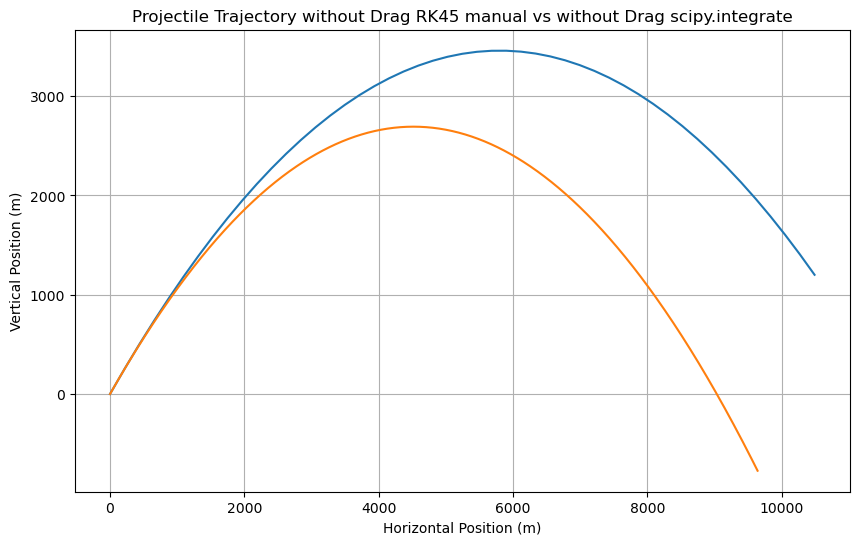

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(x_vals1, y_vals1)
plt.plot(x_vals,y_vals)
plt.title('Projectile Trajectory without Drag RK45 manual vs without Drag scipy.integrate')
plt.xlabel('Horizontal Position (m)')
plt.ylabel('Vertical Position (m)')
plt.grid(True)
plt.show()

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). Your answers should depend only on $c, m, v, v_x, v_y,$ and $g$.

Equations with no air resistance ($c = const$):

* $v_x' = $(-(c_y)*(V)*(Vx))/mass

* $x' = $Vx

* $v_y' = $-g-((c_y)*(V)*(Vy))/mass)

* $y' = $Vy

Code the equations into a function

In [12]:
#code
g=9.81  # gravitational acceleration (m/s^2)
gamma=0.25  # N·s^2/m^4
D=0.15  # Diameter of cannonball (m)
theta=50 #(degrees)
Height=10000  # Scale height for atmosphere (m)
mass=rho*(4/3)*np.pi*(D/2)**3  # Mass of iron cannonball (kg), based on density 7.8g/cm^3
angle=theta*np.pi/180  # launch angle in radians
V0=340  # Initial velocity (m/s) trying the speed of sound
Vx0=V0 * np.cos(angle)  # Initial horizontal velocity (m/s)
Vy0=V0 * np.sin(angle)  # Initial vertical velocity (m/s)
x0=0  # Initial horizontal position
y0=0  # Initial vertical position

In [13]:
def drag_coefficient(y):
    constant=1
    return gamma*D**2*constant

In [14]:
def equations(t,variables):
    x,y,Vx,Vy=variables
    V=np.sqrt(Vx**2+Vy**2)  
    c_y=drag_coefficient(y)   
    dxdt=Vx
    dydt=Vy
    dVxdt=-(c_y*V*Vx)/mass
    dVydt=-g-(c_y*V*Vy)/mass    
    return [dxdt,dydt,dVxdt,dVydt]

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [15]:
#codes
t_span=(0,35)  
t_eval=np.linspace(0,35,1000)  
initial_conditions=[x0,y0,Vx0,Vy0]
solution=solve_ivp(equations,t_span,initial_conditions,method='RK45',t_eval=t_eval)
x_valsC=solution.y[0]
y_valsC=solution.y[1]
t_vals = solution.t

Plot the ball's trajecory and find it's horizontal range. At what time does the ball hit the ground?

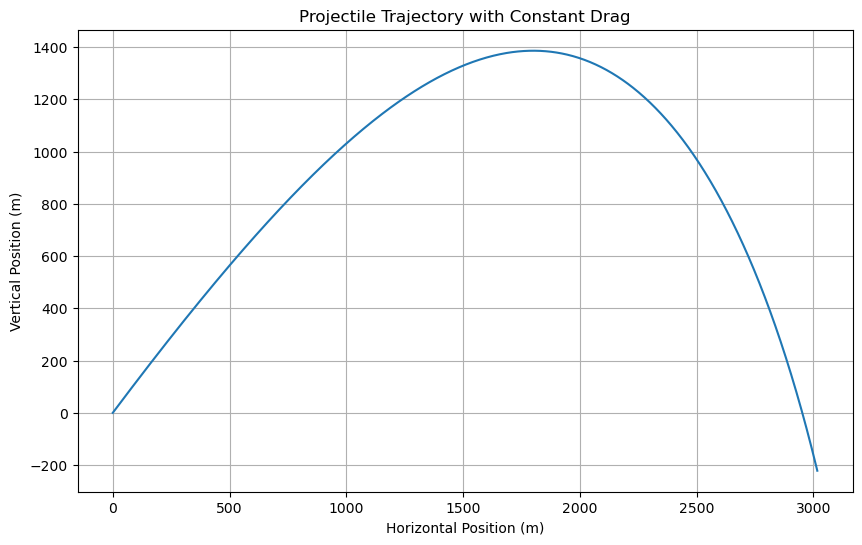

In [16]:
#codes
plt.figure(figsize=(10,6))
plt.plot(x_valsC, y_valsC)
plt.title('Projectile Trajectory with Constant Drag')
plt.xlabel('Horizontal Position (m)')
plt.ylabel('Vertical Position (m)')
plt.grid(True)
plt.show()

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). For this part write out explicitly what $c$ is in your equations, e.g. $a*c = a* \gamma D^2exp(-y/\lambda)$. Your equations should depend only on $\gamma, \lambda, y, D, v, v_x, v_y, m,$ and $g$.

Equations with no air resistance ($c = \gamma D^2exp(-y/\lambda)$):

* $v_x' = $(-(c_y)*(V)*(Vx))/mass


* $x' = $Vx

* $v_y' = $-g-((c_y)*(V)*(Vy))/mass)

* $y' = $Vy

Code the equations into a function

In [17]:
#code
g=9.81  # gravitational acceleration (m/s^2)
gamma=0.25  # N·s^2/m^4
D=0.15  # Diameter of cannonball (m)
theta=50 #(degrees)
Height=10000  # Scale height for atmosphere (m)
mass=rho*(4/3)*np.pi*(D/2)**3  # Mass of iron cannonball (kg), based on density 7.8g/cm^3
angle=theta*np.pi/180  # launch angle in radians
V0=340  # Initial velocity (m/s) trying the speed of sound
Vx0=V0 * np.cos(angle)  # Initial horizontal velocity (m/s)
Vy0=V0 * np.sin(angle)  # Initial vertical velocity (m/s)
x0=0  # Initial horizontal position
y0=0  # Initial vertical position

In [18]:
def drag_coefficient(y):
    return gamma*D**2*np.exp(-y/Height)

In [19]:
def equations(t,variables):
    x,y,Vx,Vy=variables
    V=np.sqrt(Vx**2+Vy**2)  
    c_y=drag_coefficient(y)   
    dxdt=Vx
    dydt=Vy
    dVxdt=-(c_y*V*Vx)/mass
    dVydt=-g-(c_y*V*Vy)/mass    
    return [dxdt,dydt,dVxdt,dVydt]

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [20]:
#codes
t_span=(0,35)  
t_eval=np.linspace(0,35,1000)  
initial_conditions=[x0,y0,Vx0,Vy0]
solution=solve_ivp(equations,t_span,initial_conditions,method='RK45',t_eval=t_eval)
x_valsD=solution.y[0]
y_valsD=solution.y[1]
t_valsD = solution.t

Plot the ball's trajectory and find it's horizontal range. At what time does it hit the ground?

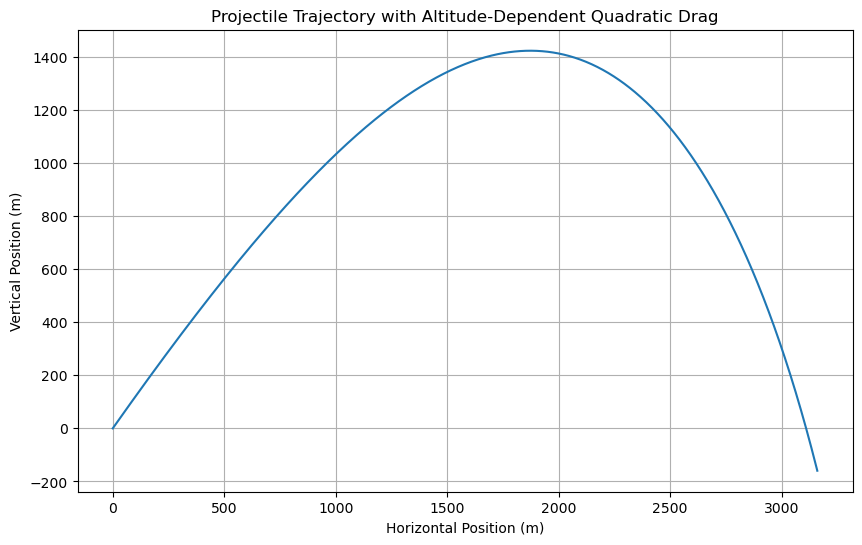

In [21]:
#codes
plt.figure(figsize=(10,6))
plt.plot(x_valsD, y_valsD)
plt.title('Projectile Trajectory with Altitude-Dependent Quadratic Drag')
plt.xlabel('Horizontal Position (m)')
plt.ylabel('Vertical Position (m)')
plt.grid(True)
plt.show()

In [22]:
max_height=np.max(y_vals)
ground_hit_index=np.where((y_valsD<=0)&(t_valsD>0))[0][0]
time_hit_ground=t_valsD[ground_hit_index]
range_at_ground=x_valsD[ground_hit_index]
print(f"Maximum height: {max_height:.2f} meters")
print(f"Time when projectile hits the ground is approximately: {time_hit_ground:.2f} seconds")
print(f"Range (horizontal distance) when projectile hits the ground is approximately: {range_at_ground:.2f} meters")

Maximum height: 2691.85 meters
Time when projectile hits the ground is approximately: 33.77 seconds
Range (horizontal distance) when projectile hits the ground is approximately: 3110.20 meters


In [23]:
#part E sorry accidentally deleted it: plot all three

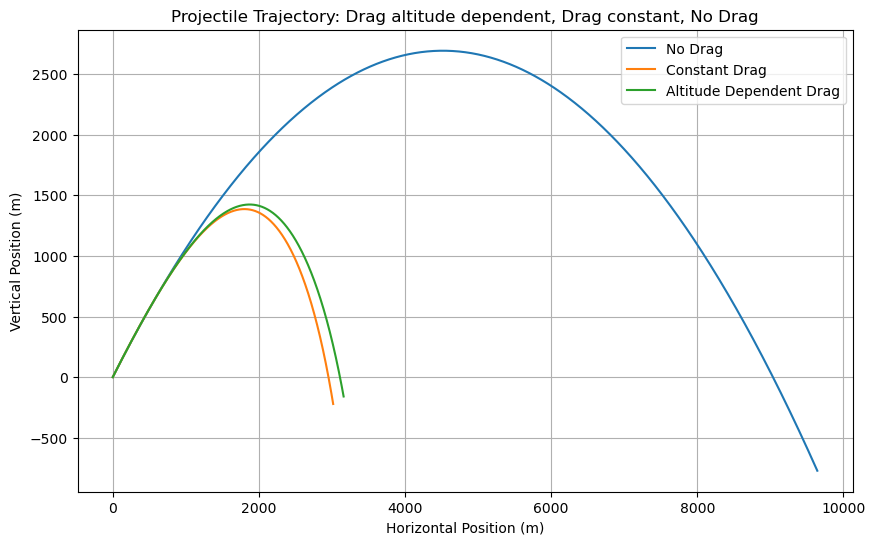

In [48]:
#codes
plt.figure(figsize=(10, 6))
#plt.plot(x_vals1, y_vals1)
plt.plot(x_vals,y_vals)
plt.plot(x_valsC, y_valsC)
plt.plot(x_valsD, y_valsD)
plt.title('Projectile Trajectory: Drag altitude dependent, Drag constant, No Drag')
plt.xlabel('Horizontal Position (m)')
plt.ylabel('Vertical Position (m)')
plt.grid(True)
plt.legend(['No Drag','Constant Drag','Altitude Dependent Drag'])
plt.show()

Your results should look like the plot below.

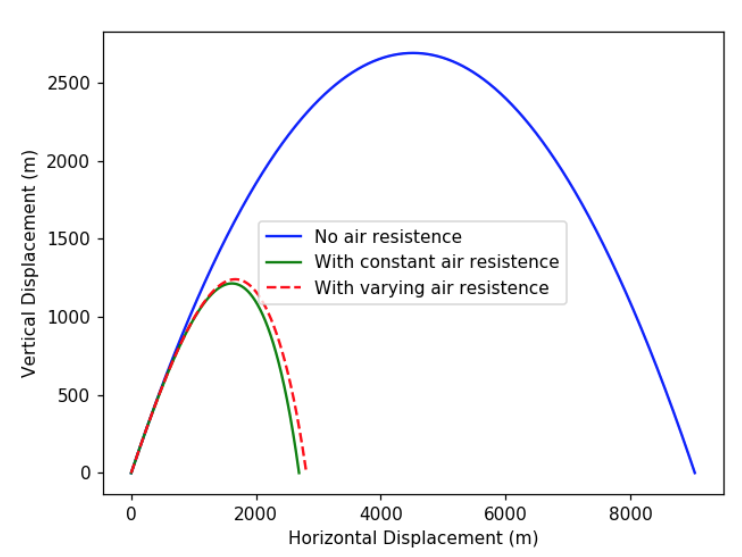

**What impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$) ?**

In [51]:
''' Drag: Altidude Dependent'''
g=9.81  # gravitational acceleration (m/s^2)
gamma=0.25  # N·s^2/m^4
D=0.15  # Diameter of cannonball (m)
theta=50 #(degrees)
Height=10000  # Scale height for atmosphere (m)
mass=rho*(4/3)*np.pi*(D/2)**3  # Mass of iron cannonball (kg), based on density 7.8g/cm^3
angle=theta*np.pi/180  # launch angle in radians
V0=340  # Initial velocity (m/s) trying the speed of sound
Vx0=V0 * np.cos(angle)  # Initial horizontal velocity (m/s)
Vy0=V0 * np.sin(angle)  # Initial vertical velocity (m/s)
x0=0  # Initial horizontal position
y0=0  # Initial vertical position
def drag_coefficient(y):
    return gamma*D**2*np.exp(-y/Height)
def equations(t,variables):
    x,y,Vx,Vy=variables
    V=np.sqrt(Vx**2+Vy**2)  
    c_y=drag_coefficient(y)   
    dxdt=Vx
    dydt=Vy
    dVxdt=-(c_y*V*Vx)/mass
    dVydt=-g-(c_y*V*Vy)/mass    
    return [dxdt,dydt,dVxdt,dVydt]
t_span=(0,35) 
t_eval=np.linspace(0,35,1000)  
initial_conditions=[x0,y0,Vx0,Vy0]
solution=solve_ivp(equations,t_span,initial_conditions,method='RK45',t_eval=t_eval)
x_valsD=solution.y[0]
y_valsD=solution.y[1]
t_valsD = solution.t
max_height=np.max(y_vals)
ground_hit_index=np.where((y_valsD<=0)&(t_valsD>0))[0][0]
time_hit_ground=t_valsD[ground_hit_index]
range_at_ground=x_valsD[ground_hit_index]
print("With Altitude Dependent Drag:")
print(f"Maximum height with altitude dependent Drag: {max_height:.2f} meters")
print(f"Time when projectile hits the ground is approximately: {time_hit_ground:.2f} seconds")
print(f"Range (horizontal distance) when projectile hits the ground is approximately: {range_at_ground:.2f} meters")

With Altitude Dependent Drag:
Maximum height with altitude dependent Drag: 2691.85 meters
Time when projectile hits the ground is approximately: 33.77 seconds
Range (horizontal distance) when projectile hits the ground is approximately: 3110.20 meters


In [53]:
'''Drag: Constant'''
g=9.81  # gravitational acceleration (m/s^2)
gamma=0.25  # N·s^2/m^4
D=0.15  # Diameter of cannonball (m)
theta=50 #(degrees)
Height=10000  # Scale height for atmosphere (m)
mass=rho*(4/3)*np.pi*(D/2)**3  # Mass of iron cannonball (kg), based on density 7.8g/cm^3
angle=theta*np.pi/180  # launch angle in radians
V0=340  # Initial velocity (m/s) trying the speed of sound
Vx0=V0 * np.cos(angle)  # Initial horizontal velocity (m/s)
Vy0=V0 * np.sin(angle)  # Initial vertical velocity (m/s)
x0=0  # Initial horizontal position
y0=0  # Initial vertical position
def drag_coefficient(y):
    constant=1
    return gamma*D**2*constant
def equations(t,variables):
    x,y,Vx,Vy=variables
    V=np.sqrt(Vx**2+Vy**2)  
    c_y=drag_coefficient(y)   
    dxdt=Vx
    dydt=Vy
    dVxdt=-(c_y*V*Vx)/mass
    dVydt=-g-(c_y*V*Vy)/mass    
    return [dxdt,dydt,dVxdt,dVydt]
t_span=(0,35)  
t_eval=np.linspace(0,35,1000)  
initial_conditions=[x0,y0,Vx0,Vy0]
solution=solve_ivp(equations,t_span,initial_conditions,method='RK45',t_eval=t_eval)
x_valsC=solution.y[0]
y_valsC=solution.y[1]
t_valsC = solution.t
max_height=np.max(y_vals)
ground_hit_index=np.where((y_valsC<=0)&(t_valsC>0))[0][0]
time_hit_ground=t_valsC[ground_hit_index]
range_at_ground=x_valsC[ground_hit_index]
print("With Constant Drag:")
print(f"Maximum height with constant Drag: {max_height:.2f} meters")
print(f"Time when projectile hits the ground is approximately: {time_hit_ground:.2f} seconds")
print(f"Range (horizontal distance) when projectile hits the ground is approximately: {range_at_ground:.2f} meters")

With Constant Drag:
Maximum height with constant Drag: 2691.85 meters
Time when projectile hits the ground is approximately: 33.28 seconds
Range (horizontal distance) when projectile hits the ground is approximately: 2953.14 meters


In [ ]:
'''deltaX_constantDrag < deltaX_altDrag  
I think this means that altitude variation has less affect, this makes sense.
As you get higher the air is getting thinner, the projectile already has a lot of kinetic energy if it is going 
the speed of sound. On a side note, aircraft turn radius also gets smaller with an increase in altitude due to the thinner air, 
but a projectile may actually travel farther because there is less drag at higher altitude. There was an instance during the
cold war where an F-11 shot itself down because it's bullets were traveling slower than the aircraft itself, 
causing the aircraft to shoot itself in the engine miraculously, this could only occur at h>4000,5000meters. This was
fixed and has not happened since. There are also many different kind of drag to consider, form drag, wave drag, parasite drag. 
All of these would affect a projectile. 
'''

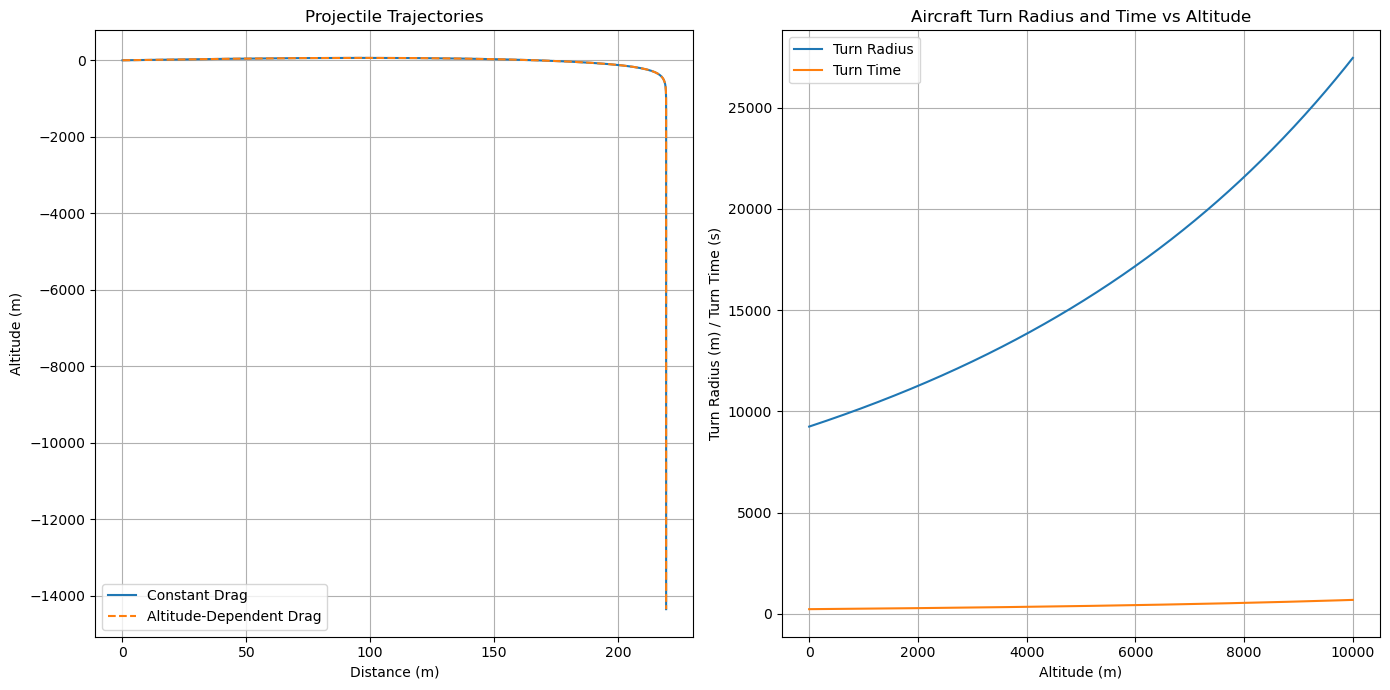

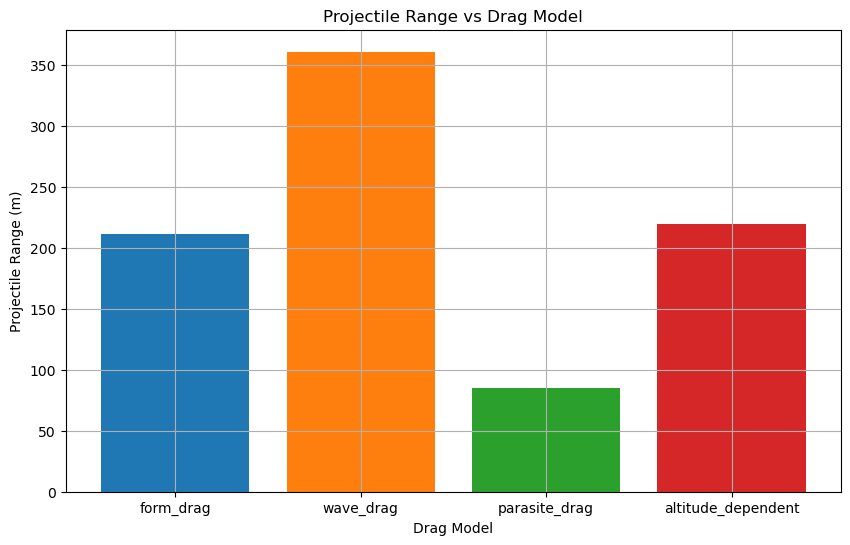

In [57]:
'''Here is some code that signifies the previous statement, 
it's a little off topic but I think it's worth mentioning if we're talking about drag'''
R=287.05  # Specific gas constant for air, J/(kg·K)
T0=288.15  # Sea level standard temperature, K
P0=101325  # Sea level standard pressure, Pa
L=0.00649  # Temperature lapse rate, K/m
g=9.80665  # Acceleration due to gravity, m/s^2
rho=7.8*1000 # Density, Kg/m^3
D=0.15  # Diameter of cannonball (m)
mass_projectile=rho*(4/3)*np.pi*(D/2)**3  # Mass of iron cannonball (kg), based on density 7.8g/cm^3
Cd_constant=0.47     # Drag coefficient for constant drag
A_projectile=0.01    # Cross-sectional area of the projectile (m^2)
Cd_form_drag=0.5    # Drag coefficient for form drag
Cd_wave_drag=0.2    # Drag coefficient for wave drag
Cd_parasite_drag=0.6  # Drag coefficient for parasite drag
def air_density(altitude):
    """
    Calculate the air density at a given altitude using the barometric formula.
    """
    T=T0-L*altitude
    P=P0*(1-L*altitude/T0)**(g/(R*L))
    return P/(R*T)
def drag_force(density,velocity,area,Cd):
    """
    Calculate the drag force given the air density, velocity, area, and drag coefficient.
    """
    return 0.5*density*velocity**2*Cd*area
def projectile_equations(t, y, drag_model):
    """
    Equations of motion for the projectile with varying drag models.
    """
    altitude=y[1]
    velocity=np.sqrt(y[2]**2+y[3]**2)
    density=air_density(altitude)    
    if drag_model == 'constant':
        drag = drag_force(density, velocity, A_projectile, Cd_constant)
    elif drag_model == 'altitude_dependent':
        drag = drag_force(density, velocity, A_projectile, Cd_constant)
    elif drag_model == 'form_drag':
        drag = 0.5 * density * velocity**2 * A_projectile * Cd_form_drag
    elif drag_model == 'wave_drag':
        Mach_number = velocity / 343.0  # Speed of sound ~343 m/s
        drag = 0.5 * density * velocity**2 * A_projectile * (Cd_wave_drag + 0.2 * Mach_number**2)
    elif drag_model == 'parasite_drag':
        drag = 0.5 * density * velocity**2 * A_projectile * Cd_parasite_drag * (1 + 0.1 * velocity)    
    dxdt = y[2]
    dydt = y[3]
    dvxdt = -drag*y[2]/mass_projectile
    dvydt = -g-drag*y[3]/mass_projectile    
    return [dxdt,dydt,dvxdt,dvydt]
def compute_projectile_trajectory(drag_model):
    """
    Compute the trajectory of the projectile for a given drag model.
    """
    y0=[0,0,100*np.cos(np.pi/4),100*np.sin(np.pi/4)]     
    sol=solve_ivp(
        lambda t, y: projectile_equations(t, y, drag_model),
        [0, 500],  
        y0,
        t_eval=np.linspace(0, 500, 1000)
    )
    
    return sol.t, sol.y[0], sol.y[1]
def compute_projectile_range(drag_model):
    """
    Compute the range of the projectile for a given drag model.
    """
    y0=[0,0,100*np.cos(np.pi/4),100* np.sin(np.pi / 4)]     
    sol=solve_ivp(
        lambda t, y: projectile_equations(t, y, drag_model),
        [0, 500],  
        y0,
        t_eval=np.linspace(0, 500, 1000)
    )    
    x,y=sol.y[0],sol.y[1]
    return np.max(x)
def aircraft_turn_radius(altitude):
    """
    Calculate the turn radius of the aircraft at a given altitude.
    """
    density=air_density(altitude)
    C_d=0.03  # Drag coefficient (constant)
    A=30.0    # Reference area (m^2)
    V=250.0   # Velocity of the aircraft (m/s)
    weight=50000  # Aircraft weight (N)    
    drag=drag_force(density,V,A,C_d)
    radius=V**2/(g*np.tan(np.arctan(drag/weight)))   
    return radius
def aircraft_turn_time(altitude):
    """
    Calculate the turn time of the aircraft at a given altitude.
    """
    radius = aircraft_turn_radius(altitude)
    V = 250.0  # Velocity of the aircraft (m/s)
    turn_time = 2 * np.pi * radius / V
    return turn_time
times, x_constant, y_constant = compute_projectile_trajectory('constant')
_, x_altitude, y_altitude = compute_projectile_trajectory('altitude_dependent')
drag_models = ['form_drag', 'wave_drag', 'parasite_drag', 'altitude_dependent']
ranges = {model: compute_projectile_range(model) for model in drag_models}
altitudes = np.linspace(0, 10000, 500)
turn_radii = [aircraft_turn_radius(alt) for alt in altitudes]
turn_times = [aircraft_turn_time(alt) for alt in altitudes]
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(x_constant, y_constant, label='Constant Drag')
plt.plot(x_altitude, y_altitude, label='Altitude-Dependent Drag', linestyle='--')
plt.xlabel('Distance (m)')
plt.ylabel('Altitude (m)')
plt.title('Projectile Trajectories')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(altitudes, turn_radii, label='Turn Radius')
plt.plot(altitudes, turn_times, label='Turn Time')
plt.xlabel('Altitude (m)')
plt.ylabel('Turn Radius (m) / Turn Time (s)')
plt.title('Aircraft Turn Radius and Time vs Altitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
for model in drag_models:
    plt.bar(model, ranges[model])
plt.xlabel('Drag Model')
plt.ylabel('Projectile Range (m)')
plt.title('Projectile Range vs Drag Model')
plt.grid(True)
plt.show()